In [16]:
import pandas as pd
import random
import numpy as np
import seaborn as sns 
sns.set(style="darkgrid", font_scale=1.2) 
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.sparse.linalg import svds
data=pd.read_csv('E:\\Essay\\ratings_Books(1).csv')
data.columns =["userID", "itemID", "rating",'timestamp']
data.head(5)
data1 = data.copy()   #使用data1进行操作，避免误触data原数据又要再读取浪费时间
print(data.shape)
print(data.dtypes)
num_test=800000
data_final = data1.iloc[:num_test,0:]
data_final.shape


(22507154, 4)
userID        object
itemID        object
rating       float64
timestamp      int64
dtype: object


(800000, 4)

In [17]:
data_final = data_final.drop(['timestamp'],axis=1)
data_final.head(5)

,userID,itemID,rating
0,A2IIIDRK3PRRZY,0000000116,1.0
1,A1TADCM7YWPQ8M,0000000868,4.0
2,AWGH7V0BDOJKB,0000013714,4.0
3,A3UTQPQPM4TQO0,0000013714,5.0
4,A8ZS0I5L5V31B,0000013714,5.0


In [18]:

users_count = data_final.userID.value_counts()
users_count


del_index = users_count[users_count<100].index                     #要删除的index=评分个数小于100的用户数据
data_final_1 = data_final[~data_final.userID.isin(del_index)]     
len(data_final_1)
data_final_1.shape

# Number of unique user id and product id in the sample dataset
print('样本数据data_final_1中的用户数 = ', data_final_1['userID'].nunique())
print('样本数据data_final_1中的产品数 = ', data_final_1['itemID'].nunique())

# 得到用户-商品评分矩阵
rating_matrix = data_final_1.pivot(index='userID',columns='itemID',values='rating')
rating_matrix.head()
final_ratings_matrix = rating_matrix.fillna(0)
final_ratings_matrix.head()
# 重新给userID编号,因为data_final_1不存在一个用户给同一本书两次评分，所以形成的用户-商品矩阵的用户不存在重复
final_ratings_matrix.reset_index(drop = True,inplace = True)
final_ratings_matrix.head()

样本数据data_final_1中的用户数 =  55
样本数据data_final_1中的产品数 =  6087


itemID,000077135X,000100039X,0001501232,0001839233,0001847775,0001848062,0001850032,0001850164,0002005395,0002007770,...,0062020161,006202017X,0062020188,0062020447,0062020455,006202048X,0062020560,0062020617,0062020625,0062020633
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 用0填充

In [19]:
rating_matrix.head()

itemID,000077135X,000100039X,0001501232,0001839233,0001847775,0001848062,0001850032,0001850164,0002005395,0002007770,...,0062020161,006202017X,0062020188,0062020447,0062020455,006202048X,0062020560,0062020617,0062020625,0062020633
userID,,,,,,,,,,,,,,,,,,,,,
A13G1TKIKHGV3F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A13OFOB1394G31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A14BTJRH9VNLJJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A14OJS0VWMOSWO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A18FUHNBP90IB4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 填充方式

In [5]:
def fill_with_zero(rating_matrix):
    R = rating_matrix.fillna(0)
    return R

In [20]:
#用户平均值（行）填充
def fill_with_row_avg(rating_matrix):
    R = rating_matrix.values
    m,n = np.shape(rating_matrix)
    for i in range(m):
        for j in range(n):
            if np.isnan(R[i][j]):
                R[i][j] = np.nanmean(R[i,:])
    R = pd.DataFrame(R)
    return R

# SVD算法完整

In [21]:
def Density(R):
    num_ratings = np.count_nonzero(R)
    #print('given_num_of_ratings = ', num_ratings)

    total_num_ratings = R.shape[0] * R.shape[1]
    #print('possible_num_of_ratings = ', total_num_ratings)

    density = (num_ratings/total_num_ratings)
    density *= 100
    #print ('density: {:4.2f}%'.format(density))
    R.reset_index(drop = True,inplace = True)    
    return density

In [22]:
def Svd(R, K):
    U, sigma, Vt = svds(R.values, K)
    sigma = np.diag(sigma)
    P = np.dot(np.dot(U,sigma),Vt)
    P_df = pd.DataFrame(P,columns=R.columns)
    return P_df

In [23]:
# Recommend the items with the highest predicted ratings
def recommend_item(userID, R, P_df, num_recommendation):

    # Index starts at 0
    user_idx = userID-1
    
    # Get and sort the user's ratings
    sorted_rating = R.iloc[user_idx].sort_values(ascending=False)

    # Sorted_user_predication_ratings
    sorted_user_prediction = P_df.iloc[user_idx].sort_values(ascending=False)

    # Sorted_user_predictions
    recom = pd.concat([sorted_rating, sorted_user_prediction], axis=1)
    recom.index.name = '推荐的商品序号'
    recom.columns = ['用户评分', '预测的用户评分']
    recom = recom.loc[recom.用户评分 == 0]
    recom = recom.sort_values('预测的用户评分', ascending=False)
    
    print('\n以下是对用户(ID = {})推荐的商品:\n'.format(userID))
    print(recom.head(num_recommendation))

In [24]:
def Rmse(R,P_df):
    # 每个商品的实际平均评分
    actual_rating_each_item = R.mean()
    predicted_rating_each_item = P_df.mean()
    rmse_df = pd.concat([R.mean(), P_df.mean()], axis=1)
    rmse_df.columns=['实际平均评分','预测平均评分']
    rmse_df.head()
    rmse = round((((rmse_df.实际平均评分-rmse_df.预测平均评分)**2).mean()**0.5),4)
    return rmse

# 剔除小于100的用户数

In [25]:
#x = np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250])
x = np.array([10,20,30,40,50])
rmse_fill_0 = []
rmse_fill_row = []
rmse_fill_col = []
iteration = x.shape[0]

In [26]:
#0填充
for i in range(iteration):
    K = x[i]
    R_fill_0 = fill_with_zero(rating_matrix)
    density = Density(R_fill_0)
    P_df = Svd(R_fill_0,K)
    rmse = Rmse(R_fill_0,P_df)
    rmse_fill_0.append(rmse)
print ('density: {:4.2f}%'.format(density))
print(rmse_fill_0)        

density: 3.19%
[0.0503, 0.0285, 0.0218, 0.0168, 0.0087]


In [27]:
%%time
#行填充
R_fill_row = fill_with_row_avg(rating_matrix)
for i in range(iteration):
    K = x[i]
    density = Density(R_fill_row)
    P_df = Svd(R_fill_row,K)
    rmse = Rmse(R_fill_row,P_df)
    rmse_fill_row.append(rmse)
print ('density: {:4.2f}%'.format(density))
print(rmse_fill_row)        

density: 100.00%
[0.0013, 0.001, 0.0007, 0.0005, 0.0002]
CPU times: total: 14.1 s
Wall time: 13.8 s


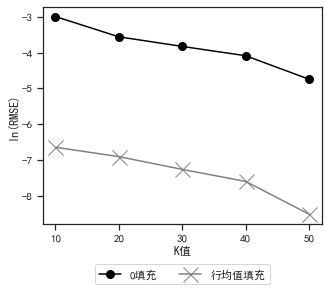

In [8]:
x = [10,20,30,40,50]
y_0 = [0.0503, 0.0285, 0.0218, 0.0168, 0.0087]
y_0_log = np.log(y_0)
y_row = [0.0013, 0.001, 0.0007, 0.0005, 0.0002]
y_row_log = np.log(y_row)
plt.figure(figsize=(5,4))

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.set_style('ticks')

# 纵坐标使用Log，结果显示更显著
plt.rcParams['axes.unicode_minus'] = False # 用于显示中文 
#plt.title('基于不同相似度的评分预测结果比较')  # 折线图标题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示汉字
plt.xlabel('K值')  # x轴标题
plt.ylabel('ln(RMSE)')  # y轴标题

plt.plot(x,y_0_log,marker='o',markersize=8,color='black',label='0填充')
plt.plot(x,y_row_log,marker='x',markersize=15,color='grey',label='行均值填充')


plt.legend(bbox_to_anchor=(0.5,-0.3),loc=8,ncol=10)

plt.savefig('E:\Essay\CF_SVD.jpg',dpi=400,bbox_inches='tight')

# 推荐

In [105]:
R = np.array(rating_matrix)
m,n = np.shape(rating_matrix)
for i in range(m):
    for j in range(n):
        if np.isnan(R[i][j]):
            R[i][j] = np.nanmean(R[i,:])
R_df = pd.DataFrame(R,columns  = final_ratings_matrix.columns)


R_df.head()

# 重新给userID编号,因为data_final_1不存在一个用户给同一本书两次评分，所以形成的用户-商品矩阵的用户不存在重复
R_df.reset_index(drop = True,inplace = True)

# 因为矩阵过于稀疏，采用SVD进行计算
# Singular Value Decomposition
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_df.values, k = 25)
print('sigma的值是：',sigma)
print('\n')
sigma = np.diag(sigma)

P = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
P_df = pd.DataFrame(P, columns = R_df.columns)
P_df.head()

sigma的值是： [   9.21827033    9.3733414     9.41487217    9.90809071    9.978653
   10.1311226    10.16777481   10.29436485   10.38615667   10.59556349
   10.69074293   10.79606599   10.96789527   11.06354359   11.46561892
   11.64457657   11.99588375   12.20883368   12.69070314   13.44070127
   13.87978653   15.62190226   16.99871409   21.83622689 2477.82667154]




itemID,000077135X,000100039X,0001501232,0001839233,0001847775,0001848062,0001850032,0001850164,0002005395,0002007770,...,0062020161,006202017X,0062020188,0062020447,0062020455,006202048X,0062020560,0062020617,0062020625,0062020633
0,4.341077,4.338523,4.342751,4.314891,4.359108,4.323960,4.340895,4.340895,4.347246,4.347631,...,4.339269,4.339269,4.331395,4.343441,4.341117,4.341117,4.334023,4.341117,4.341117,4.341117
1,4.605080,4.590299,4.609257,4.624808,4.596586,4.593942,4.607748,4.607748,4.618711,4.603490,...,4.604452,4.604452,4.578484,4.603237,4.606677,4.606677,4.595903,4.606677,4.606677,4.606677
2,4.491378,4.609497,4.486155,4.483171,4.486468,4.480274,4.477127,4.477127,4.493244,4.481406,...,4.482779,4.482779,4.452160,4.404196,4.484895,4.484895,4.484885,4.484895,4.484895,4.484895
3,5.000974,4.973963,4.999415,5.015825,4.985863,4.979367,5.001548,5.001548,5.009616,5.084523,...,5.001901,5.001901,5.017500,5.014155,4.998130,4.998130,4.980869,4.998130,4.998130,4.998130
4,4.320067,4.330147,4.320278,4.311461,4.324656,4.313599,4.318189,4.318189,4.323135,4.331856,...,4.319349,4.319349,4.312567,4.311510,4.319592,4.319592,4.314705,4.319592,4.319592,4.319592


In [84]:
def recommend_item(userID,P,num_recommendation):
    user_index = userID-1
    P_df = pd.DataFrame(P)
    sorted_user_rating_predication = P_df.iloc[user_index].sort_values(ascending =False)
    sorted_user_rating_predication.index.name = '推荐书籍'
    sorted_user_rating_predication.columns =[ '预测评分']
    print('以下是对用户(user_id = {})的{}本推荐书籍:\n'.format(userID,num_recommendation))
    print(sorted_user_rating_predication.head(num_recommendation))

In [98]:
userid= 6
num = 5
recommend_item(userid,P_df,num)

以下是对用户(user_id = 6)的5本推荐书籍:

推荐书籍
0060194995    4.305196
006092988X    4.295794
0062008110    4.280466
0006514006    4.258992
0060098902    4.255149
Name: 5, dtype: float64


In [ ]:

#userid=6
To Kill a Mockingbird (40th Anniversary)
A Tree Grows in Brooklyn
Wuthering Heights
The Other Boleyn Girl
The Great Gatsby

## 画奇异值

In [172]:
y_sigma = np.diag(sigma)
y_sigma_sum = np.sum(y_sigma)
y_2 = y_sigma/y_sigma_sum
y_sigma
x = np.linspace(25, 1, 25)
y_2*100

0.61531667+0.79042416+89.6919+0.56547906+0.50241824

92.16553813

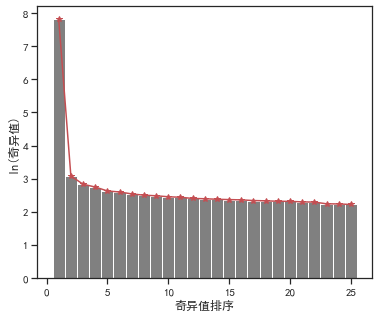

In [174]:
plt.rcParams['font.sans-serif'] = 'SimHei'#设置字体为SimHei显示中文\n",
plt.rc('font', size=14)#设置图中字号大小\n",
plt.figure(figsize=(6,5))#设置画布\n",
plt.bar(x,np.log(y_sigma),color='gray',width = 1)#绘制柱状图\n",
plt.plot(x,np.log(y_sigma),"r", marker='*', ms=6)
#plt.title('')#添加标题\n",
plt.xlabel('奇异值排序')#添加横轴标签\n",
plt.ylabel('ln(奇异值)')#添加y轴名称\n",
plt.savefig('E:\Essay\CF_sigma.jpg',dpi=400,bbox_inches='tight')
#plt.savefig(path+'scatter.jpg')#保存图片
#plt.savefig(path+'plot.jpg')#保存图片\n",
plt.show()
